# <center>Simple Linear Regression</center>



#### About this Notebook
In this notebook, we learn how to use scikit-learn to implement simple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value



##### What is Simple Linear Regression?

Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:

* One variable, denoted x, is regarded as the **predictor, explanatory, independent variable or input, features**.
* The other variable, denoted y, is regarded as the **response, outcome, tareget or dependent variable**.

Because the other terms are used less frequently today, we'll use the "predictor" and "response" terms to refer to the variables encountered in this course. The other terms are mentioned only to make you aware of them should you encounter them. Simple linear regression gets its adjective "simple," because it concerns the study of only one predictor variable. In contrast, multiple linear regression, which we study later in this course, gets its adjective "multiple," because it concerns the study of two or more predictor variables.



The simplest kind of linear regression involves taking a set of data (xi,yi), and trying to determine the "best" linear relationship


        y = a * x + b
      
Commonly, we look at the vector of errors:

        ei = yi - a * xi - b
      
and look for values (a,b) that minimize the L1, L2 or L-infinity norm of the errors. For problems involving multivariate sets of data, the number a becomes a matrix, and b a vector, but the idea is similar.


#### The data files have a simple format:

* initial comment lines, each beginning with a "#".
* the number of columns of data;
* the number of rows of data;
* for each column of data, a line containing a column label; the first column is always "Index" and counts the rows; if there is a column labeled "A0" it usually contains the value 1.0;
each row of data, on a separate line, with data separated by spaces.
* There are also some extended examples, which involve an M by N linear system, a set of linear constraints to be solved exactly, and a set of linear inequalities. In that case, a master file lists the sizes of the three sets of data, and the name of the first file, which contains the linear system.

<h1>

[Linear_Regression_Data](https://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html)
    
</h1>

### Importing Needed packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
%matplotlib inline

### Downloading Data
To download the data, we will use <a href='https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/FuelConsumption.csv'>DataSet</a>.


## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in

In [110]:
df = pd.read_csv("Datasets/FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [111]:
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


### Data Exploration
Lets first have a descriptive exploration on our data.

In [112]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [114]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [115]:
import pandas_profiling

In [116]:
pandas_profiling.ProfileReport(df)

Lets select some features to explore more.

In [117]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


we can plot each of these fearues:

<Figure size 1152x648 with 0 Axes>

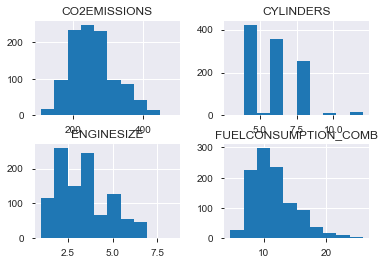

In [118]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
plt.figure(figsize=(16,9))
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

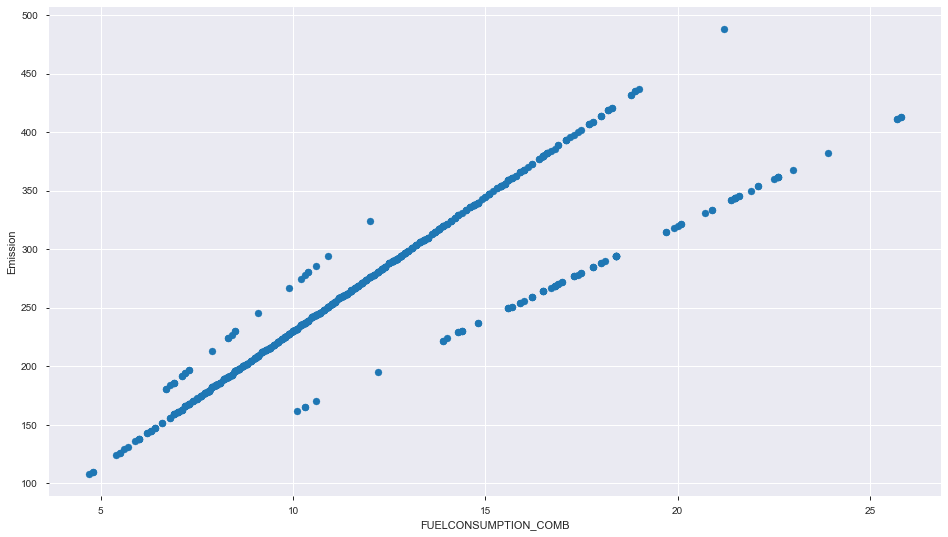

In [119]:
plt.figure(figsize=(16,9))
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)

plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

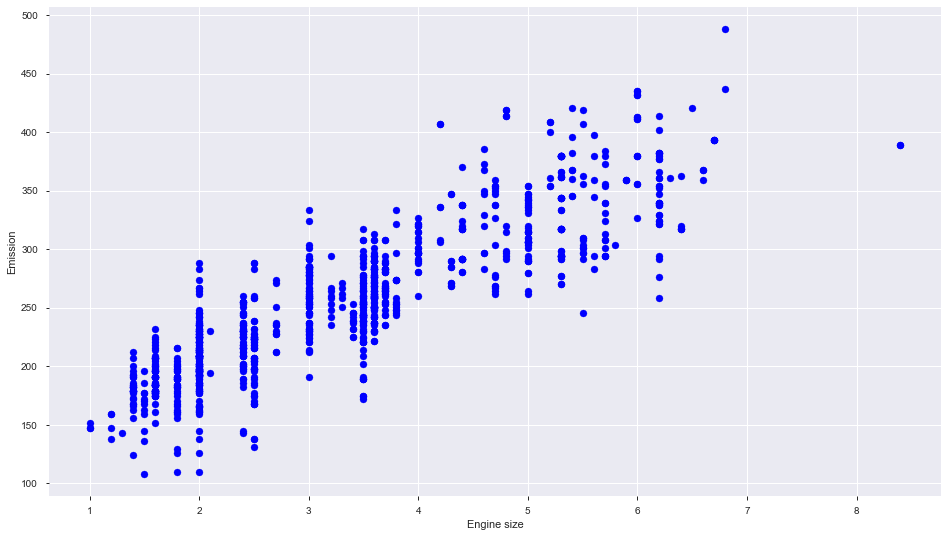

In [120]:
plt.figure(figsize=(16,9))
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.savefig('Engine_size_Emission.png')
plt.show()

Text(0, 0.5, 'Emission')

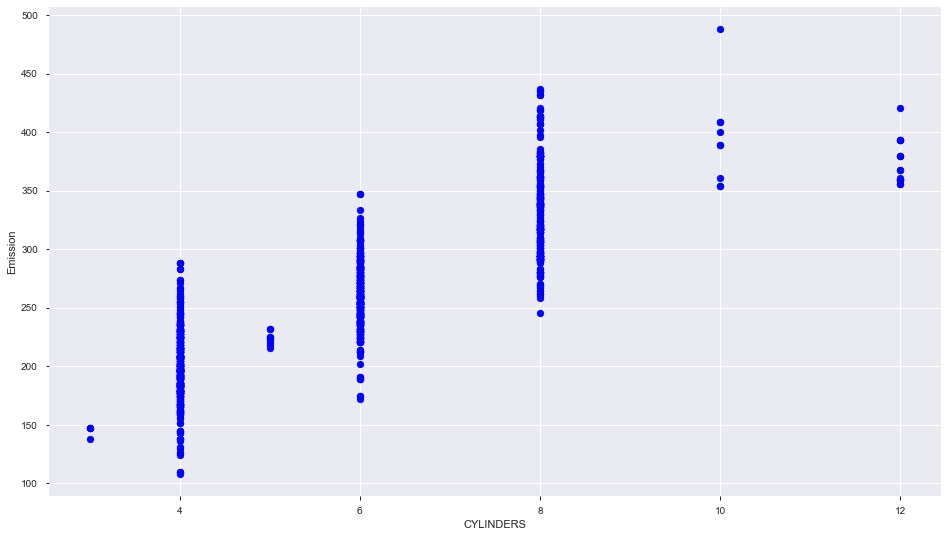

In [121]:
plt.figure(figsize=(16,9))
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")


In [122]:
!pip install scikit-learn

<img src='images/Dataset.png'/>

## Practice
plot __CYLINDER__ vs the Emission, to see how linear is their relation:

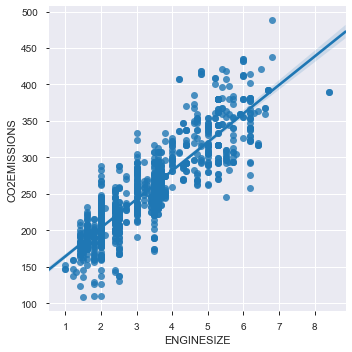

In [123]:
# write your code here
import seaborn as sns
sns.lmplot('ENGINESIZE','CO2EMISSIONS',data=cdf)

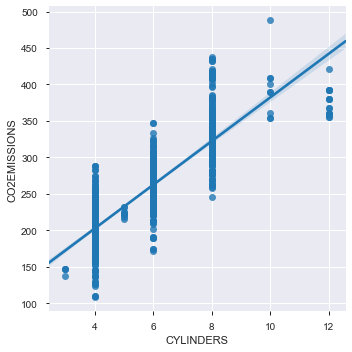

In [124]:
sns.lmplot('CYLINDERS','CO2EMISSIONS',data=cdf)

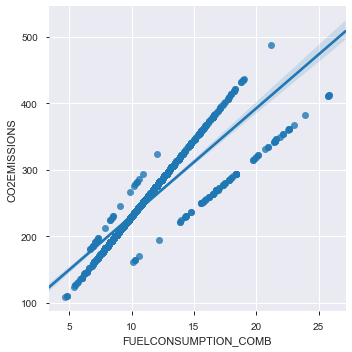

In [125]:
sns.lmplot('FUELCONSUMPTION_COMB','CO2EMISSIONS',data=cdf)

<h1 align=center>$\hat Y $   =  $\beta_0 + \beta_1*x$</h1>

Double-click __here__ for the solution.

<!-- Your answer is below:
    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

-->

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
Model = LinearRegression()

In [128]:
Model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
cdf.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'], dtype='object')

In [130]:
X_Data = cdf[['ENGINESIZE']]
X_Data.head()

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5


In [131]:
Y_Data = cdf[['CO2EMISSIONS']]
Y_Data.head()

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


In [132]:
Model.fit(X_Data,Y_Data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
print("Coff of Engine Size is",Model.coef_)

Coff of Engine Size is [[39.12519979]]


In [134]:
print("Y Intersept Point is ",Model.intercept_)

Y Intersept Point is  [125.3040995]


In [135]:
New_Predict = Model.predict([[2.4]])
print("Predication",New_Predict)

Predication [[219.20457898]]


In [136]:
Model.score(X_Data,Y_Data)

0.7641458597854816

In [137]:
Model.rank_

1

In [138]:
Model.singular_

array([46.22848556])

In [139]:
Model.normalize

False

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.
<img src='images/SLR_TRAIN_TEST.png'/>

In [140]:
len(df)

1067

In [141]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [142]:
train.shape   # 80 % of the Data 

(861, 4)

In [143]:
test.shape  # 20% of the Data

(206, 4)

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

<h1 align='center'>$\hat y$ =$\beta_0 +\beta_1*x$ </h1>

#### Train data distribution

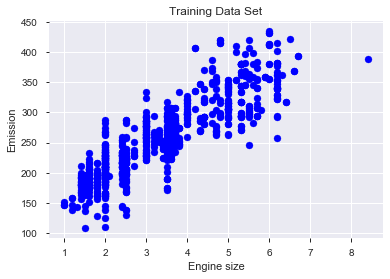

In [144]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.title("Training Data Set")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

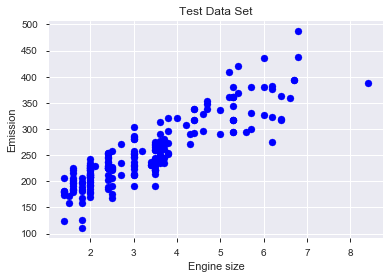

In [145]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='blue')
plt.title("Test Data Set")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Using sklearn package to model data.

In [146]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
regr.score(train_x,train_y)

0.7589670674005404

In [148]:
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.17743603]]
Intercept:  [125.09201803]


In [149]:
print("if EngineSize is 2.4 then The CO2EMISSION Is:",regr.predict([[2.4]]))

if EngineSize is 2.4 then The CO2EMISSION Is: [[219.11786449]]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs

we can plot the fit line over the data:

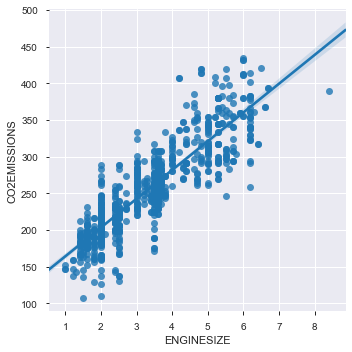

In [150]:
sns.lmplot('ENGINESIZE','CO2EMISSIONS',data=train)

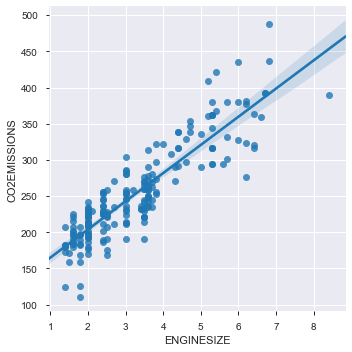

In [151]:
sns.lmplot('ENGINESIZE','CO2EMISSIONS',data=test)

In [152]:
regr.coef_[0][0]

39.17743602683284

In [153]:
regr.intercept_[0]

125.09201802867531

In [154]:
plt.scatter(train.ENGINESIZE, tr.ain.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-y')  # y = mx+b
plt.xlabel("Engine size")
plt.ylabel("Emission")

NameError: name 'tr' is not defined

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

- **Mean absolute error**: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- **Mean Squared Error (MSE)**: Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

<img src ='images/Accurcy.png'/>

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])   # Actaul
new_Predict = regr.predict(test_x)     # Predicate
new_Predict[0:5]   # Newly Predict

In [ ]:
test_y[0:5]  # Actual Values

In [ ]:
error = new_Predict-test_y
error[0:5]

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(new_Predict - test_y)))
print("Residual sum of squares or Mean Square error(MSE): %.2f" % np.mean((new_Predict - test_y) ** 2))

 **Root Mean Squared Error (RMSE)**.
    - R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [ ]:
print("R2-score: %.2f" % r2_score(new_Predict , test_y) )

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
print("Mean absolute Error is:",mean_absolute_error(new_Predict,test_y))

In [ ]:
print("Mean Square Error or Residual sum of squares (MSE)",mean_squared_error(new_Predict,test_y))

In [ ]:
print("R2-Score",r2_score(new_Predict,test_y))

### Cross-validation 
● Model performance is dependent on way the data is split 

● Not representative of the model’s ability to generalize 

● Solution: Cross-validation

<img src='images/Cross_validation.png'/>

In [155]:
from sklearn.model_selection import cross_val_score 

In [156]:
cv_results = cross_val_score(regr, train_x, train_y, cv=10) 
cv_results

array([0.75289586, 0.71517565, 0.70906145, 0.79402219, 0.70797713,
       0.73541572, 0.64636139, 0.75864122, 0.83943109, 0.73603319])

In [157]:
np.mean(cv_results) 

0.7395014884490767

In [158]:
np.max(cv_results)

0.8394310875704527